Copyright 2021 University of San Andres' Authors.

In [82]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [83]:
#@title MIT License
#
# Copyright (c) 2021 University of San Andres
#
# Permission is hereby granted, free of charge, to any person obtaining a
# copy of this software and associated documentation files (the "Software"),
# to deal in the Software without restriction, including without limitation
# the rights to use, copy, modify, merge, publish, distribute, sublicense,
# and/or sell copies of the Software, and to permit persons to whom the
# Software is furnished to do so, subject to the following conditions:
#
# The above copyright notice and this permission notice shall be included in
# all copies or substantial portions of the Software.
#
# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
# IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
# FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL
# THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
# LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING
# FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER
# DEALINGS IN THE SOFTWARE.

# Entrená tu primer red neuronal: clasificación MNIST

En esta primera instancia, vamos a declarar o importar las dependencias que necesitamos para comenzar a trabajar con el tutorial.

A través de las palabras reservadas de Python3, como por ejemplo `import`, inicializaremos los siguientes paquetes.

In [84]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.6.0


## Descargá el set de datos MNIST

Este tutorial usa el conjunto de datos más famoso conocido como [MNIST](http://yann.lecun.com/exdb/mnist). Éste contiene 60.000 imágenes de números a mano alzada, en escala de grises, y un conjunto de datos de prueba de 10.000 ejemplos. Cada imagen son de baja resolución (28x28 pixels) como se ve aquí:

<table>
  <tr><td>
    <img src="../../images/mnist-dataset.png"
         alt="MNIST Sprite" width="600">
  </td></tr>
  <tr><td align="center">
    <b>Figura 1.</b> <a href="http://yann.lecun.com/exdb/mnist">Muestras MNIST</a><br/>&nbsp;
  </td></tr>
</table>

MNIST es un conjunto de datos utilizado como el "Hola, Mundo!" de Machine Learning para Visión por Computadoras. MNIST contiene imágenes a mano alzada desde el 0 al 9 de baja resolución.

Existen otro tipo de conjunto de datos basados en este llamado [Fashion MNIST](), los cuales funcionan como punta pie inicial para verificar que el desarrollo de algoritmos funcionan. Sirven generalemente para hacer pruebas y refinamiento de los algoritmos en cuestión. 

Utilizaremos 60.000 imágenes para entrenar una red neuronal y 10.000 imágenes para analizar la exactitud de la red para clasificar cada una de las imágenes. Se utilizará TensorFlow para acceder directamente al conjunto de datos de manera muy práctica.

In [87]:
mnist = keras.datasets.mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

## Inspección de los datos

A través de la API de Tensorflow pudimos obtener las imágenes de entrenamiento y prueba. 

En esta ocasión, vamos a inspeccionar las primeras 10 etiquetas asociadas a las primeras 10 imágenes en el conjunto de entrenamiento.

In [88]:
train_labels[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

A continuación, definimos una lista con los nombres de las clases/etiqueta en formato `string` para visualizar un poco mejor las imágenes.

In [42]:
class_names = [
    'Zero', 'One', 'Two',
    'Three', 'Four', 'Five',
    'Six', 'Seven', 'Eight',
    'Nine'
]

Uno de los primeros pasos es revisar que los datos se encuentren correctamente cargados. Por eso, en pasos anteriores revisamos algunas etiquetas del conjunto de entrenamiento. 

Ahora corroboraremos el tamaño de ambos conjuntos de datos. Habíamos dicho que serían 60.000 imágenes de entrenamiento y 10.000 de prueba.

Por último, mostraremos una de las imágenes de forma más visual con la biblioteca que importamos más arriba llamada `matplotlib`.

In [89]:
train_images.shape[0]

60000

In [90]:
test_images.shape[0]

10000

Observamos que cada uno de los pixels de la imagen puede tener un valor entre 0 y 255. Un paso previo para preparar los datos es aplicar una técnica denominada _normalización_. Es decir, haremos que los valores de los pixels estén entre 0 y 1 únicamente.

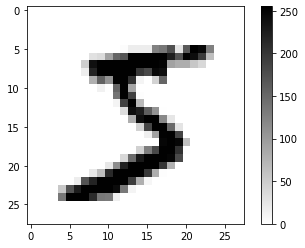

In [92]:
plt.figure()
plt.imshow(train_images[0], cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

La normalización la realizamos en ambos conjuntos de datos dividiendo las listas por 255.

In [93]:
train_images = train_images / 255.0
test_images = test_images / 255.0

A partir de lo anterior, mostramos 25 imágenes de entrenamiento con sus respectivas etiquetas.

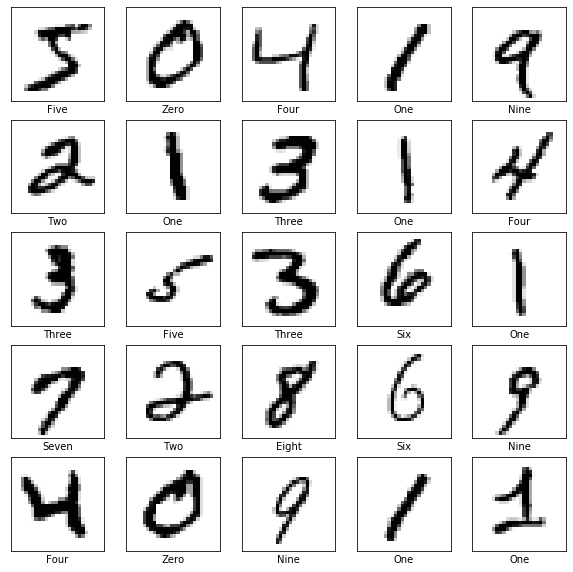

In [94]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Arquitectura de la red neuronal

Lo siguiente es definir el modelo que nos permitirá entrenarlo y luego clasificar una nueva imagen automáticamente. Para ello se definen las capas de la red neuronal, cada una de las cuáles cumplen un rol muy importante en la construcción del modelo.

En primer lugar, definimos la capa `Flatten` que permitirá convertir una imagen de 28x28 en un vector o lista de longitud 768. Esta capa luego se conecta con una segunda capa denominada `Dense`, equivalente a una capa donde todas sus neuronas se conectan con la anterior y con la siguiente. Por último, definimos una segunda capa `Dense` con la diferencia que la función de activación en la primera es una "Función ReLU", y la segunda una "Función Softmax".

In [170]:
# Modificar si es necesario
neurons_number = 1

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(neurons_number, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [171]:
print(model.summary())

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_19 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_38 (Dense)             (None, 1)                 785       
_________________________________________________________________
dense_39 (Dense)             (None, 10)                20        
Total params: 805
Trainable params: 805
Non-trainable params: 0
_________________________________________________________________
None


Por útlimo, queremos definir ciertos parámetros importante a la hora de cómo se entrena una red neuronal. Éstos son el tipo de optimizador, la función de error o _loss_, y las métricas de interés.

Respecto a las métricas, sólo hablaremos de la _accuracy_ o exactitud en este tutorial.

In [172]:
learning_rate = 1

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate), 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

## Entrenamiento

¡Ahora a entrenar!

In [173]:
epochs = 1

model.fit(train_images, train_labels, epochs=epochs)

Epoch 1/5
1875/1875 [==============================] - 2s 715us/step - loss: 2.0071 - accuracy: 0.2149
Epoch 2/5
1875/1875 [==============================] - 1s 639us/step - loss: 1.8331 - accuracy: 0.2568
Epoch 3/5
1875/1875 [==============================] - 1s 594us/step - loss: 1.7530 - accuracy: 0.2847
Epoch 4/5
1875/1875 [==============================] - 1s 595us/step - loss: 1.7043 - accuracy: 0.3161
Epoch 5/5
1875/1875 [==============================] - 1s 600us/step - loss: 1.6711 - accuracy: 0.3463


In [174]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

313/313 [==============================] - 0s 505us/step - loss: 1.6769 - accuracy: 0.3351
Test accuracy: 0.335099995136261


## Predicción

Luego del entrenamiento, viene la etapa de la _predicción_. 

A partir de las imágenes de prueba, computaremos las predicciones de cada una de ellas con la función `predict()` de `model`. Le pasaremos la lista de imágenes, y obtendremos las predicciones.

In [146]:
predictions = model.predict(test_images)

Las predicciones no dicen directamente cuál es la etiqueta o clase que le corresponde a la imagen. Las predicciones son los valores que la capa de neuronas de salida entrega. Cada una de las neuronas de salida, que tienen que ser la misma cantidad de neuronas que de etiquetas, dirá **cúal es la probabilidad de que la imagen en cuestión sea de la clase a la que la neurona corresponde**. Estos valores en la jerga de inteligencia artificial se denominan _logits_ en problemas de clasificación.

In [147]:
predictions[0]

array([0.08303633, 0.09768878, 0.0551639 , 0.06318752, 0.12673804,
       0.07999751, 0.08872207, 0.23270293, 0.14657404, 0.02618898],
      dtype=float32)

Aquí pueden ver las predicciones de la red neuronal respecto a la primer imagen de prueba.

Se puede ver que la salida es un vector de 10 posiciones, desde el 0 al 9, donde cada posición corresponde a una etiqueta. Es decir, la posición 3 del vector corresponde a la clase o etiqueta "Three".

Finalmente, en los problemas de clasificación se utiliza una función que determina cuál es la clase a la que la entrada corresponde. En este caso, la entrada es la imágen y la salida va a ser la clase o el número que la red indentificó. 

Para extraer esto, es necesario llamar a una función denominada `argmax` de la biblioteca `numpy`.

In [148]:
np.argmax(predictions[0])

7

Bien, hasta el momento hemos computado o inferido las etiquetas de cada una de las imágenes de prueba que la red neuronal NUNCA antes había visto.

El paso siguiente es verificar que la red está en lo correcto, o más específicamente, cuán en lo correcto se encuentra. Es por eso que tenemos las etiquetas asociadas al conjunto de datos de prueba. 

Observemos la etiqueta de prueba de la primer imagen.

In [149]:
test_labels[0]

7

In [150]:
# No modificar este código

def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

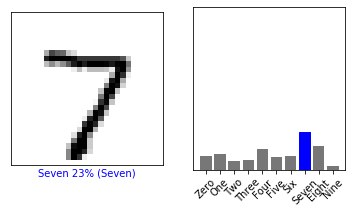

In [151]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.xticks(range(10), class_names, rotation=45)
plt.show()

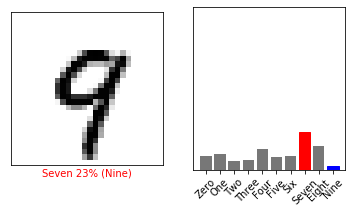

In [152]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.xticks(range(10), class_names, rotation=45)
plt.show()

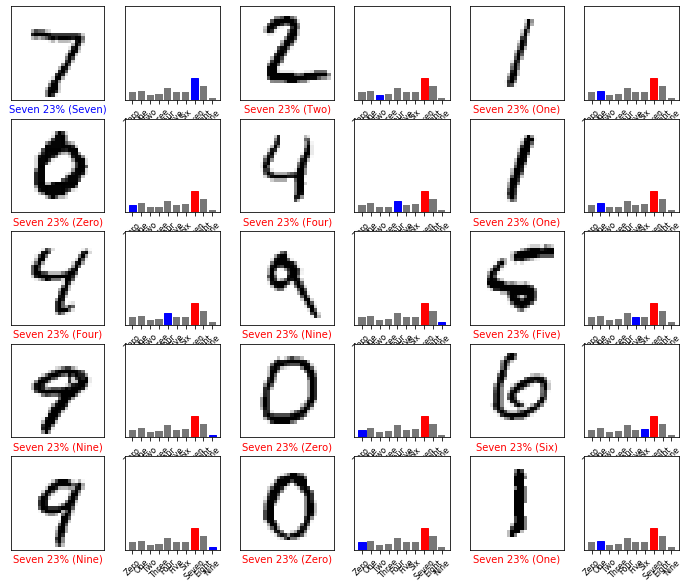

In [177]:
# Graficar las primeras X imágenes de prueba, su predicción, y la verdadera etiqueta. 
# Predicciones correctas en azul, incorrectas en rojo.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, test_labels)
    plt.xticks(range(10), class_names, rotation=45, fontsize=8)
plt.show()